# Unsupervised Learning on Country Data

#### Objective:

To categorize the countries using socio-economic and health factors that determine the overall development of the country.

#### About organization:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

#### Problem Statement:



HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. 

In this project I will categorize the countries using some socio-economic and health factors that determine the overall development of the country, then make suggestion for which countries the CEO needs to focus the most on,

#### Data source: 
This dataset is from Kaggle - https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [418]:
# Feature names
import pandas as pd
feature_names = pd.read_csv("data-dictionary.csv")
feature_names

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


## EDA

In [419]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import time
import warnings
warnings.filterwarnings('ignore')

In [420]:
data = pd.read_csv("Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [367]:
# Check for native and non-native nulls
features = data.iloc[:, 1:]
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in features.columns:
    string_null = np.array([x in a[2:] for x in features[c]])
    print(c, features[c].isnull().sum(), string_null.sum()) 

child_mort 0 0
exports 0 0
health 0 0
imports 0 0
income 0 0
inflation 0 0
life_expec 0 0
total_fer 0 0
gdpp 0 0


In [17]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


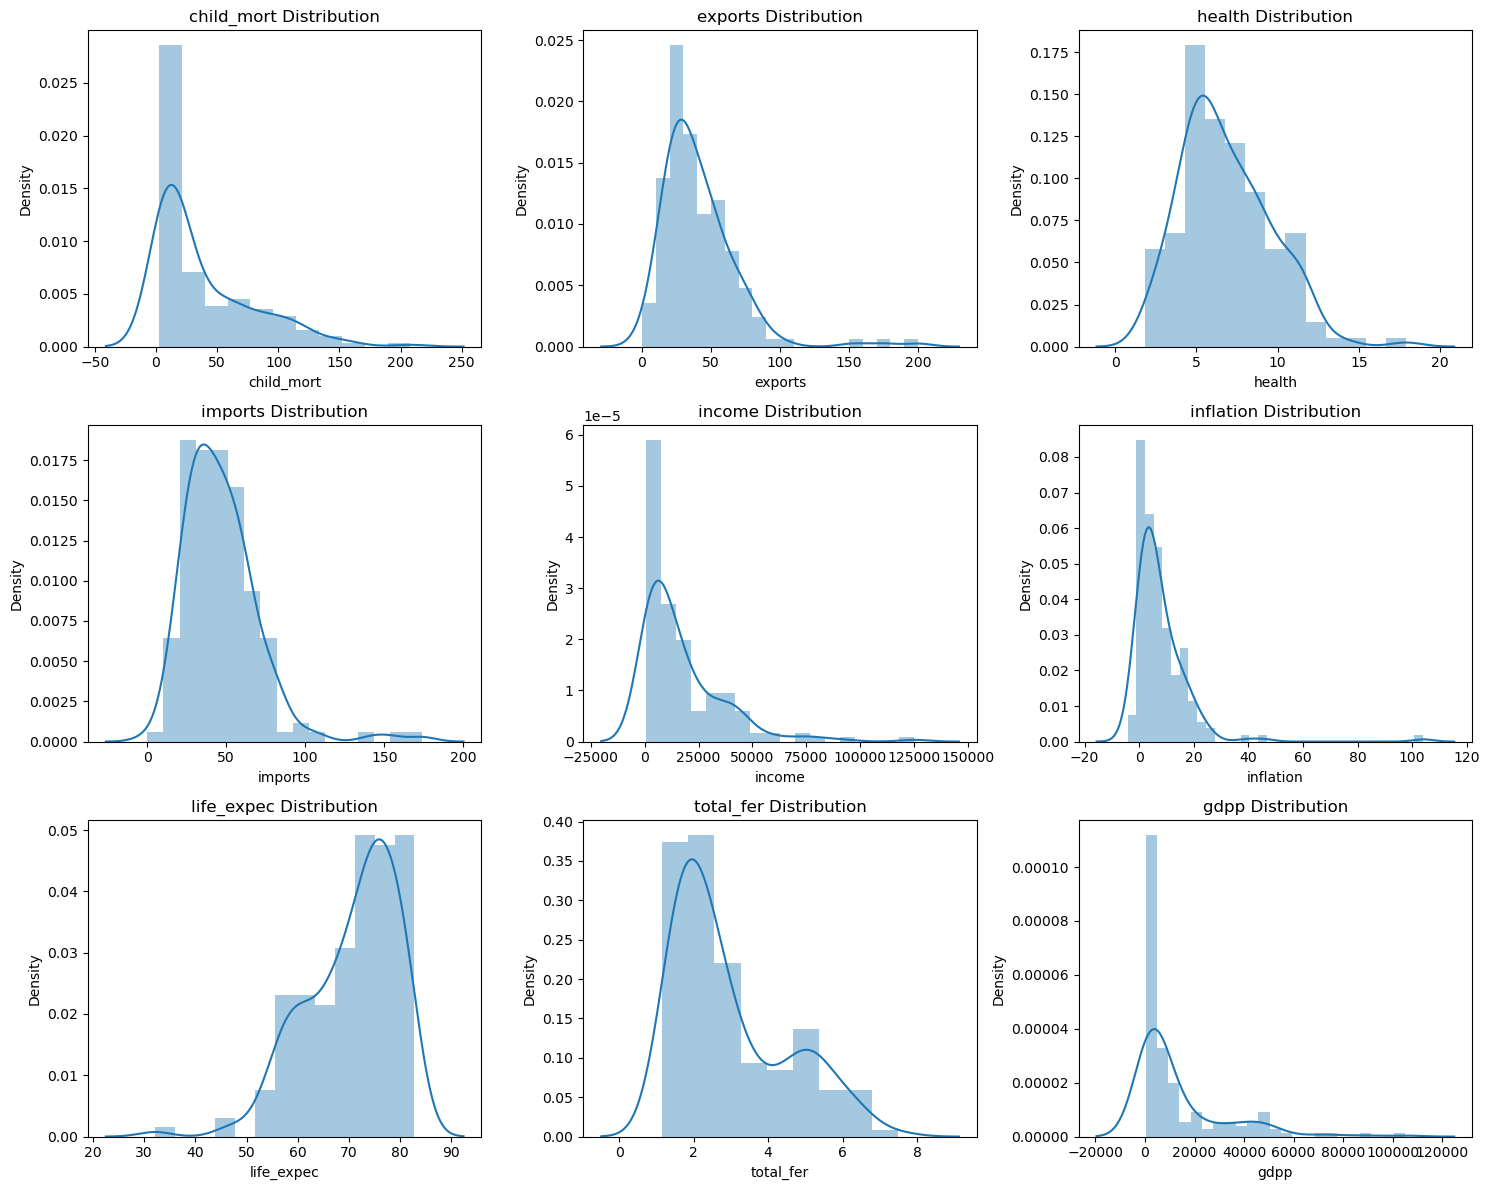

In [368]:
plt.figure(figsize=(15,12))
for i,col in enumerate(features,1):
    plt.subplot(3,3,i)
    sns.distplot(data[col], kde=True)
    plt.tight_layout()
    plt.title(col + " Distribution")
    plt.plot()

##### Observations
- Except for life expentancy, all other distributions are positively skewed.  
- Health and imports distribution are somewhat normally distribution

Text(0.5, 1.0, 'Features Heat Map')

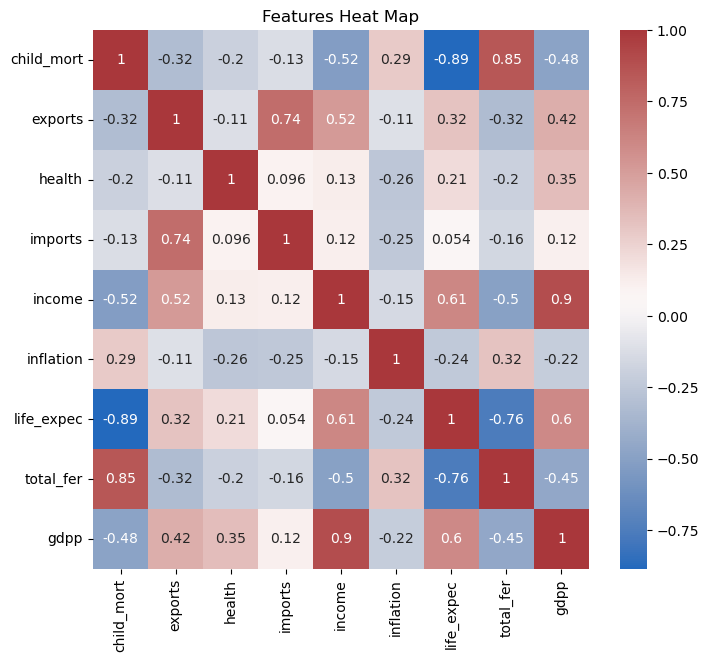

In [158]:
corr = data.corr()
plt.figure (figsize = [8,7])
cmap=sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.title("Features Heat Map")

#### Observations

- some features with positive correlation includes: total_fer and child_mort, income and gdpp, exports and imports.
- some features with negative correlation includes: life_expec and child_mort, total_fer and life_expec.

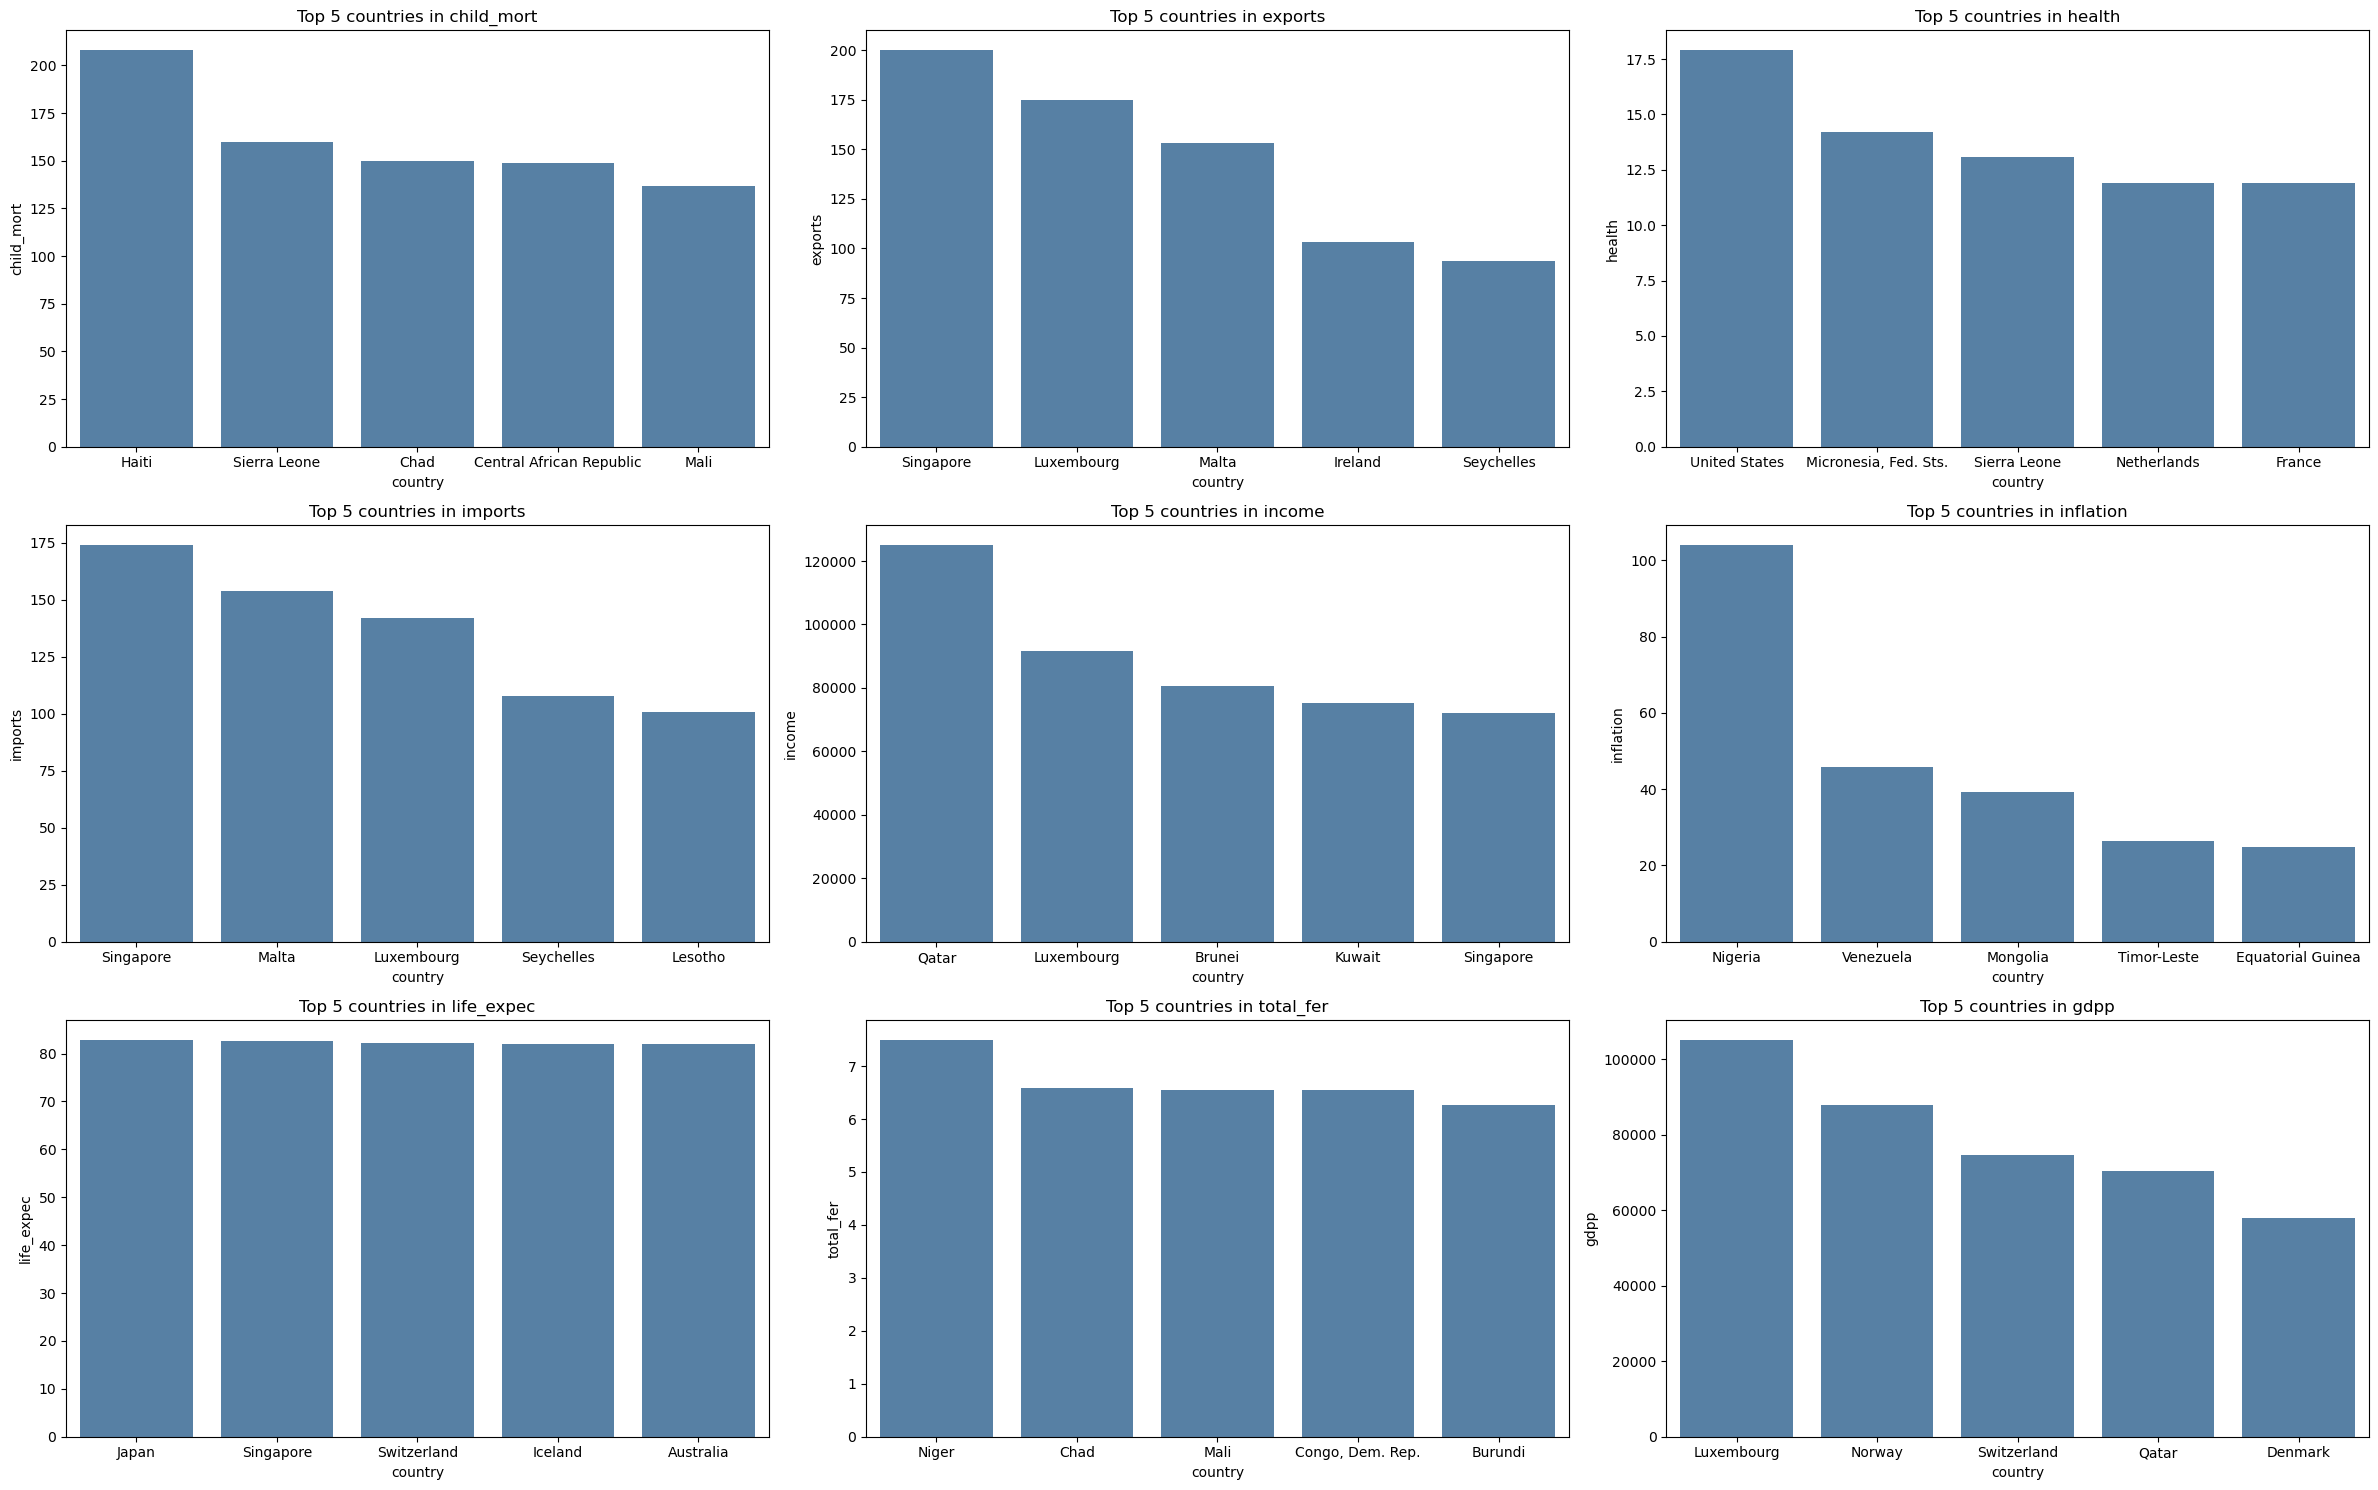

In [216]:
plt.figure(figsize=(24,15))
for i,col in enumerate(features,1):
    plt.subplot(3,3,i)
    plt.tight_layout()
    top_5=data.sort_values(by=col, ascending=False)[:5]
    sns.barplot(data=top_5, x='country', y=col, color='steelblue', saturation=0.7)
    plt.title("Top 5 countries in " + col)

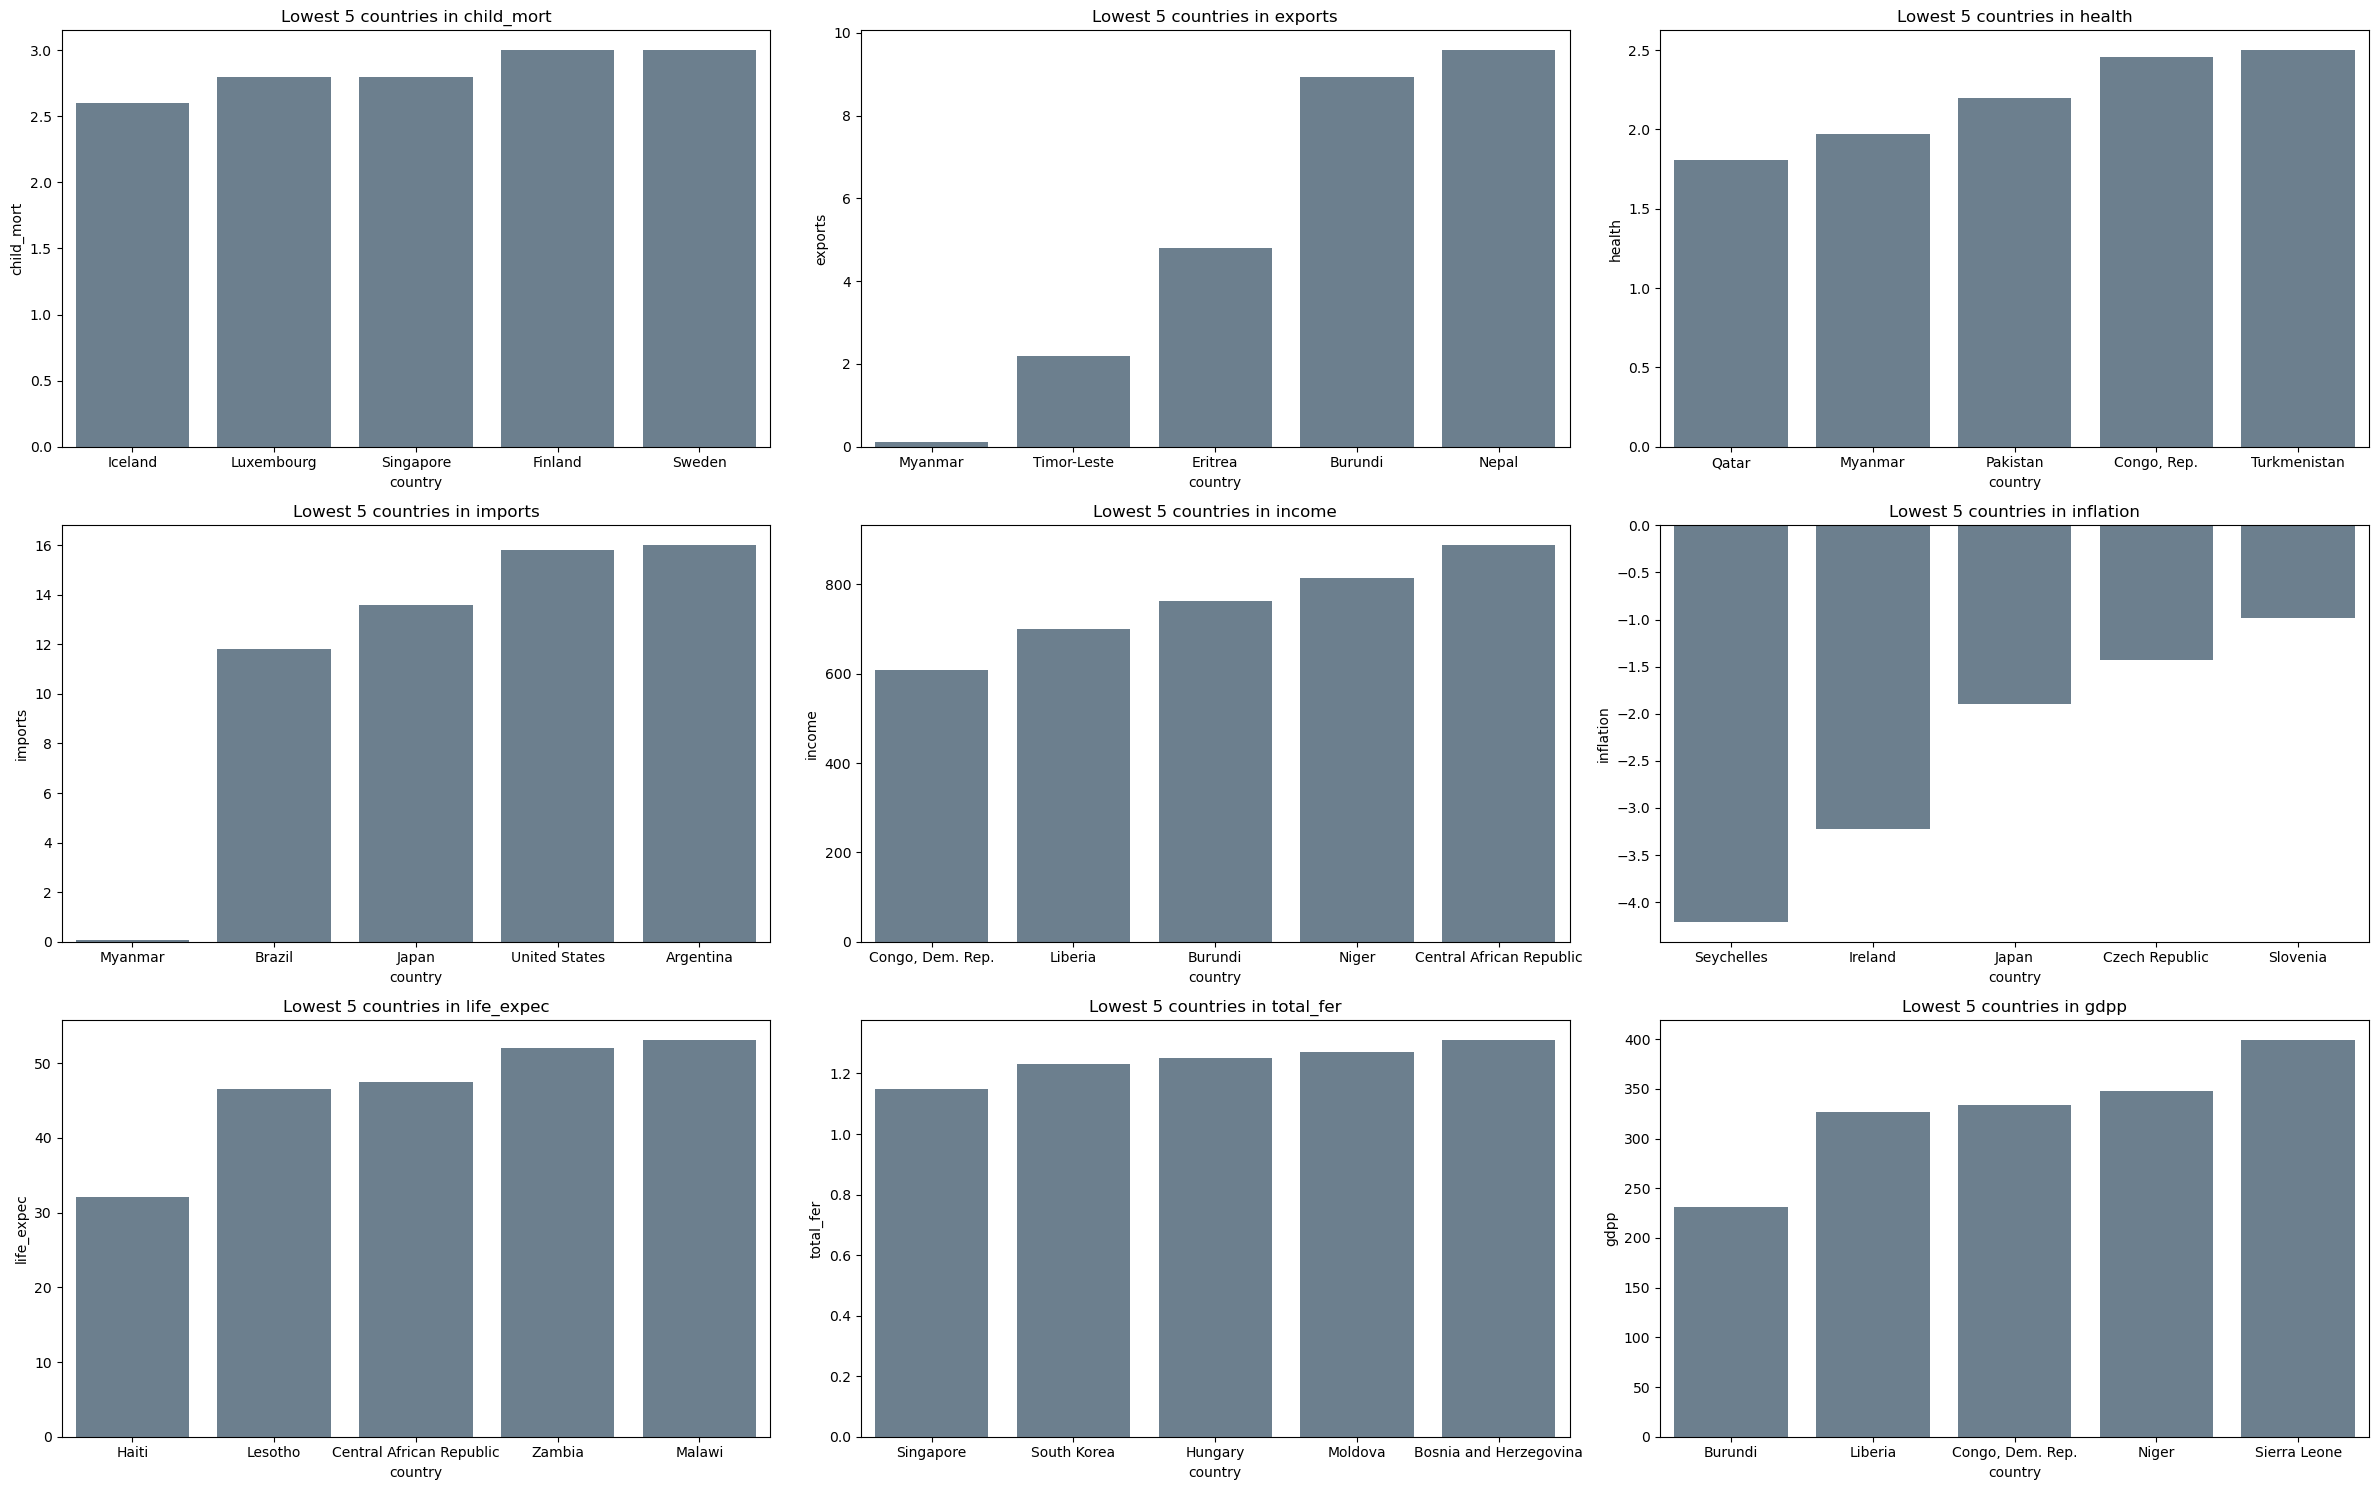

In [369]:
plt.figure(figsize=(24,15))
for i,col in enumerate(features,1):
    plt.subplot(3,3,i)
    plt.tight_layout()
    lowest_5=data.sort_values(by=col, ascending=True)[:5]
    sns.barplot(data=lowest_5, x='country', y=col, color='steelblue', saturation=0.3)
    plt.title("Lowest 5 countries in " + col)

##### Observation
- Singapore is seen consistently in both top_5 and lowest_5 bar charts. Singapore is in top 5 for exports, imports, income, and life expectancy; it is in lowest 5 for child mortality and total fertility rate.
- African countries are lowest in life expectacy, but highest in child mortality and total fertility.
- European countries and Qatar have the highest gdpp.
- Although Qatar is one of the top highest gdpp, its country placed last in health (health spending per capita).
- North American countries and European countries placed top in health spending.
- African countries are the lowest for income and gdpp, and highest for inflation.

## Data Preprocessing

### Outliers

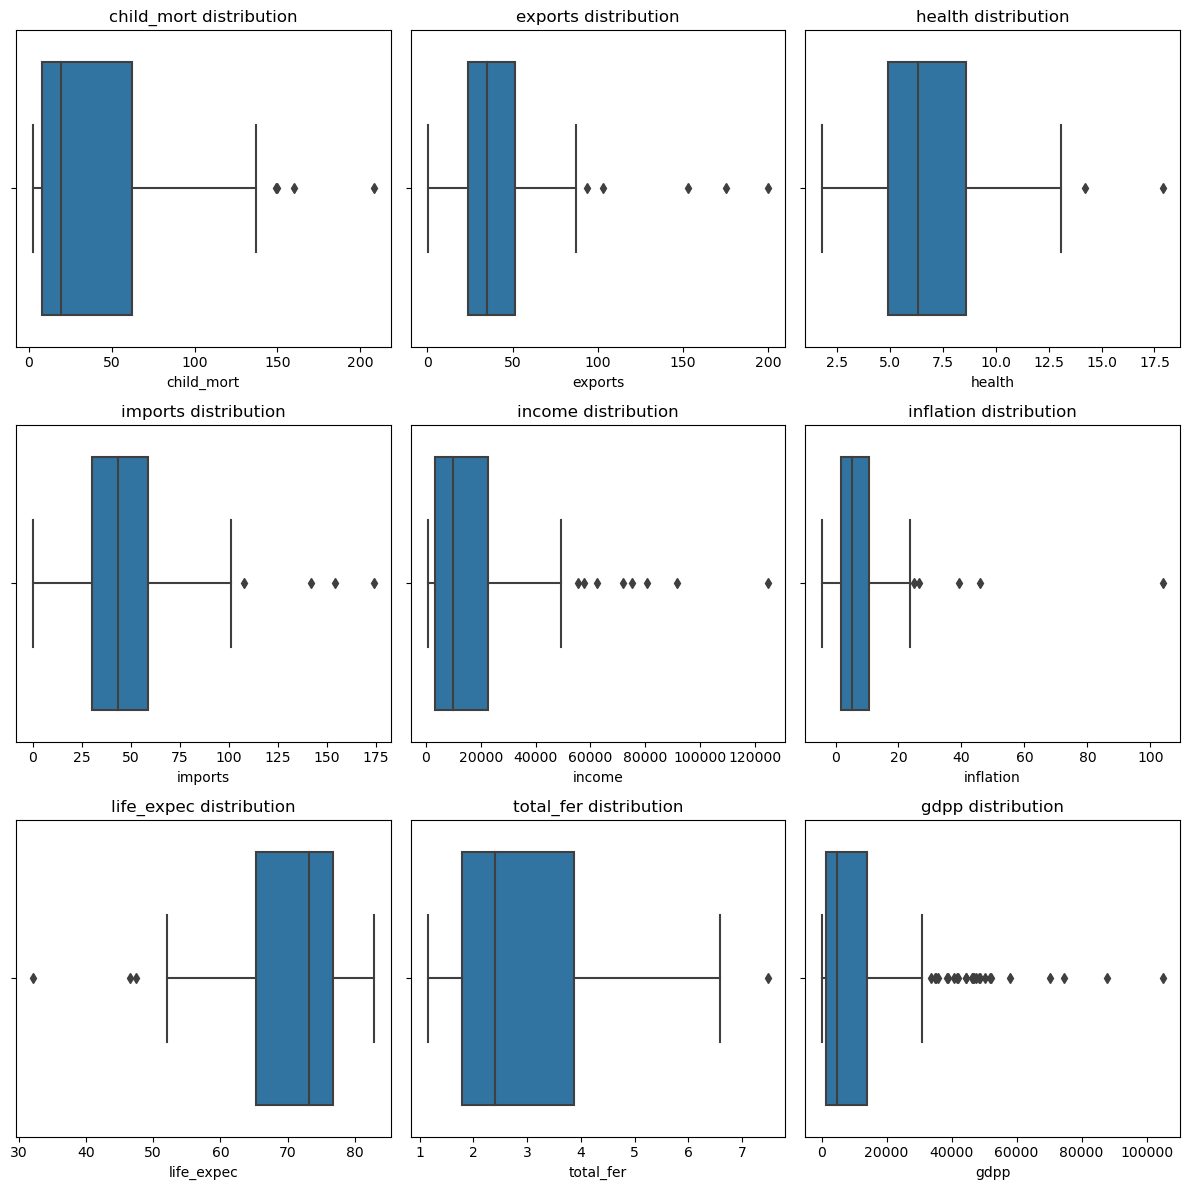

In [300]:
plt.figure(figsize=(12,12))
for i, col in enumerate(features,1):
        plt.subplot(3,3,i)
        sns.boxplot(data[col])
        plt.title(col + " distribution")
        plt.tight_layout()
        plt.plot()

#### Observation

- Since this project focuses on countries in direst need, and each data represents each country, it is not necessarily important to remove outliers. Since the data set is small, removing outliers is more disadvantageous. 

## Data Modelling

In [394]:
#Standardize the features using standard scaling.
scale = StandardScaler()
data_scaled = scale.fit_transform(features)

##### K-means clustering

I will be using k-mean clustering as my first method, I also need to choose the most optimal n_clusters. We can achieve this by using the "elbow" method, a graphical representation of finding the most opitmal K in n_clusters. This works by finding WCSS (Within-Cluster Sum of Square) the sum of the square distance between cluster points and cluster ceteroid. 
When n_cluster=2, the numbers of countries in help will be over a hundred so I would like to make n_cluster to be at least 3 to focus on the countries that need the most help.

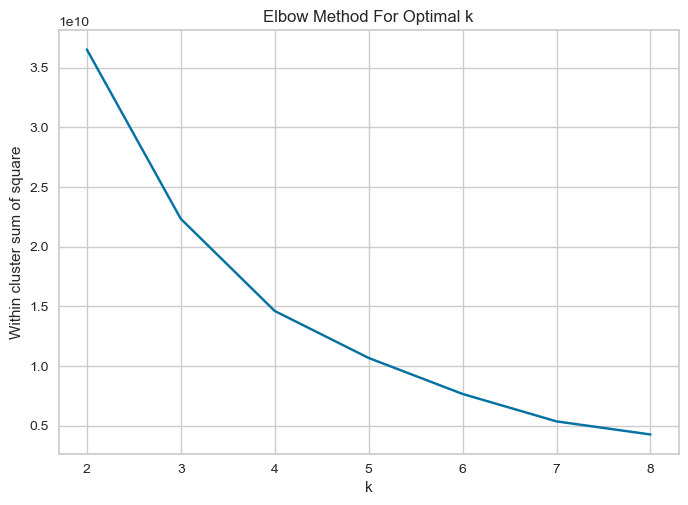

In [634]:
WCSS = []
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    WCSS.append(km.inertia_)
plt.plot(K, WCSS, 'bx-')
plt.xlabel('k')
plt.ylabel('Within cluster sum of square')
plt.title('Elbow Method For Optimal k')
plt.show()

At k=4, we can see the line shape like an "elbow", hence this will be the point we use as our n_clusters. I will apply k-means clustering to this data as my first method.

In [569]:
kmeans= KMeans(init='k-means++', n_clusters=4)
kmeans.fit(data_scaled)
kmeans.labels_
data["kmeans label"] = kmeans.labels_

##### Hierarchical Clustering

I will be using silhouette score to determine the best n_clusters for hierarchical clustering method. Silhouette coefficient measures the goodness of a clustering method, it is calculated by using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample:  
$\frac{b-a}{max(a,b)}$


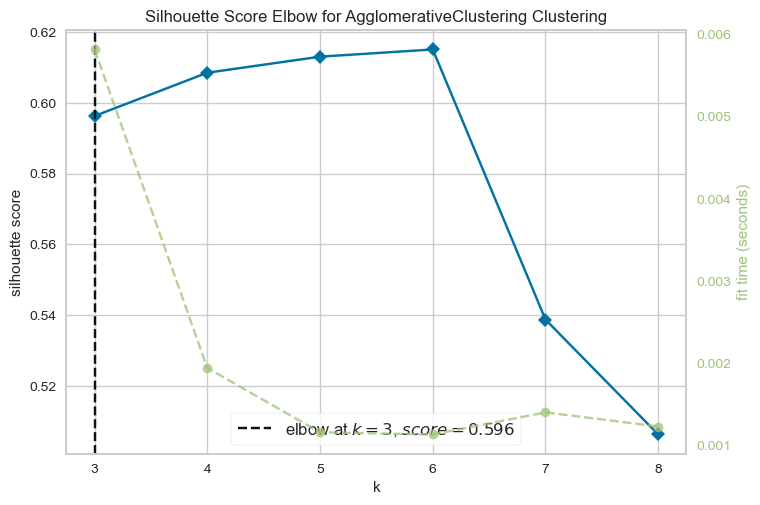

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [573]:
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,9),metric='silhouette')
visualizer.fit(features) 
visualizer.show() 

In [575]:
aggcluster= AgglomerativeClustering(n_clusters=3)
aggcluster.fit(features)
aggcluster.labels_

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2])

In [576]:
data['agg label'] = aggcluster.labels_

## Result

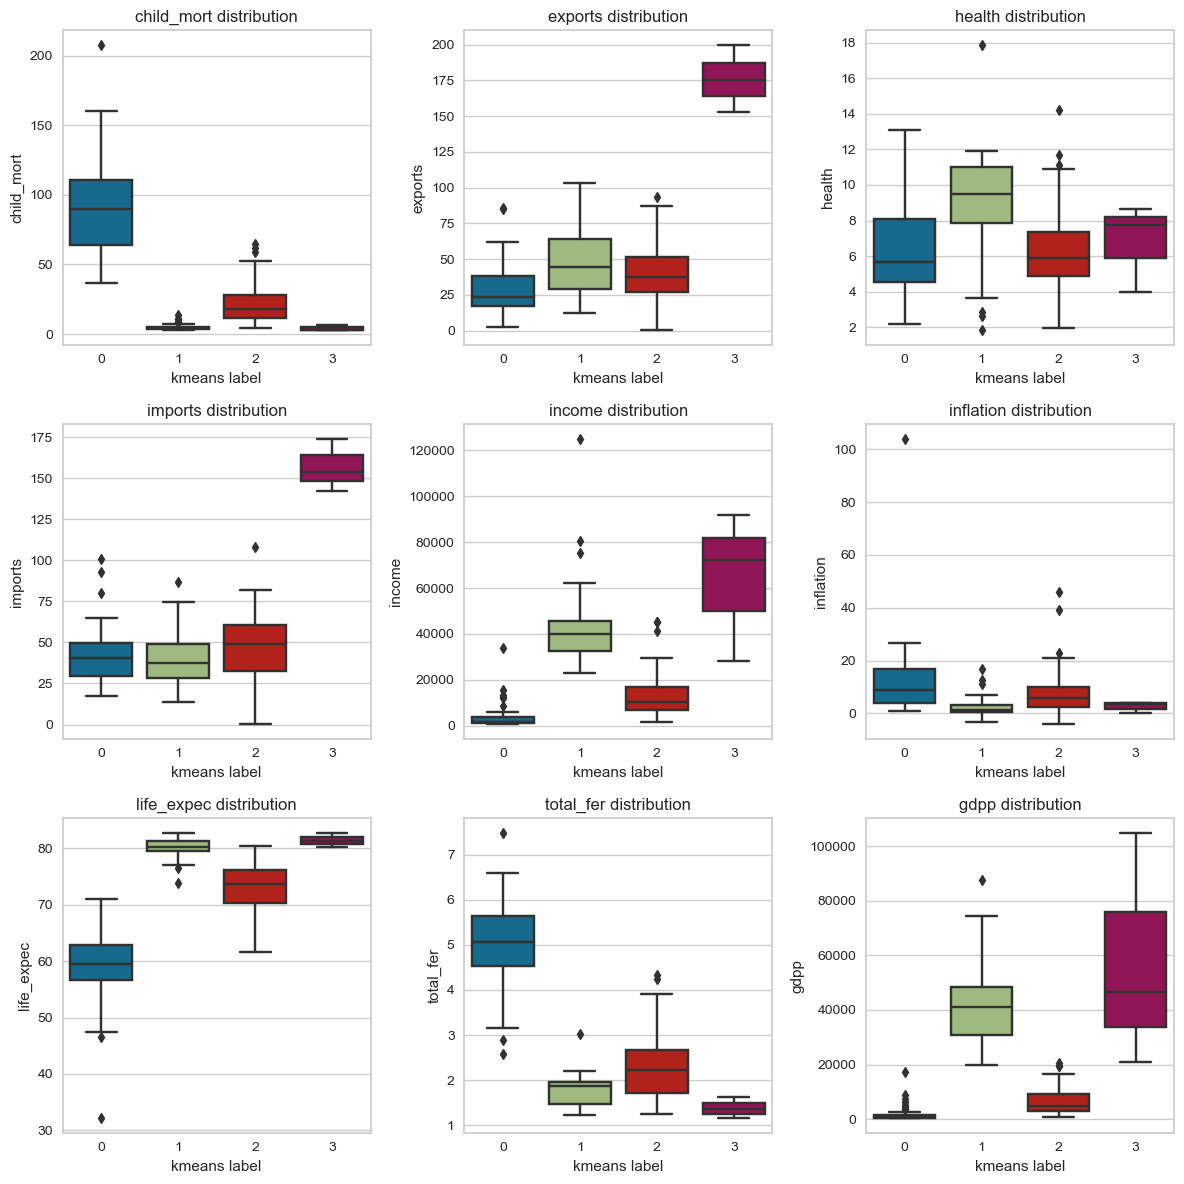

In [577]:
#Box plot distribution using kmeans cluster
plt.figure(figsize=(12,12))
for i, col in enumerate(features,1):
        plt.subplot(3,3,i)
        sns.boxplot(x=data['kmeans label'], y=data[col])
        plt.title(col + " distribution")
        plt.tight_layout()
        plt.plot()

By using Kmeans clustering method using n_clusters=3, the priority of countries that need help is as following where #1 need the most help and #4 do not need help.
- Cluster 0 - Priority #1
- Cluster 2 - Priority #2
- Cluster 1 - Priority #3
- Cluster 3 - Priority #4

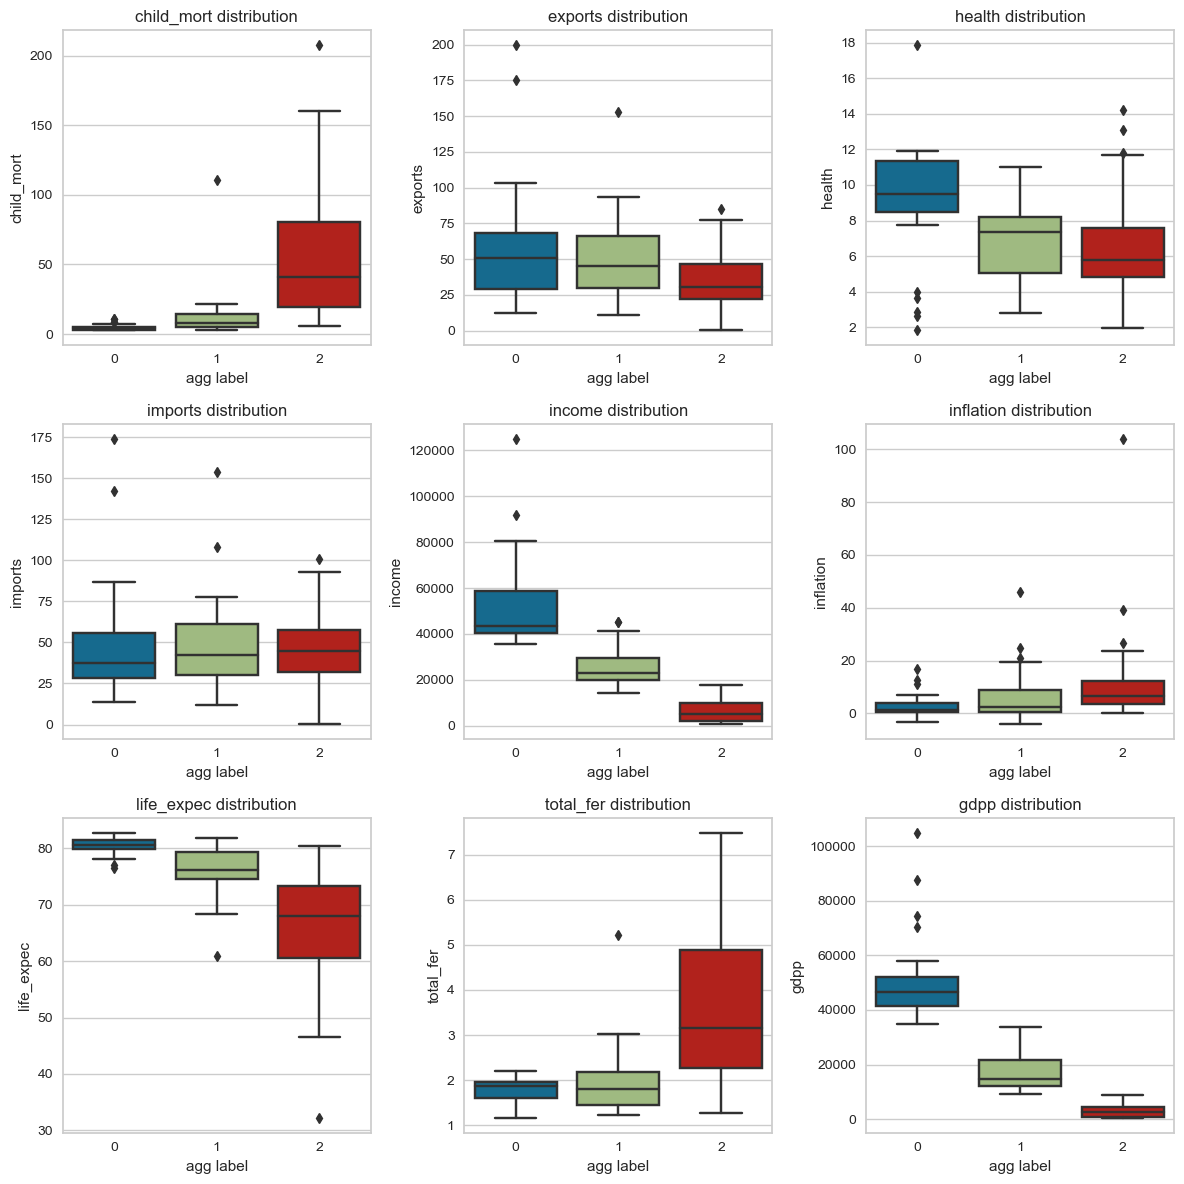

In [583]:
#Boxplot distribution using Hierarchical Clustering
plt.figure(figsize=(12,12))
for i, col in enumerate(features,1):
        plt.subplot(3,3,i)
        sns.boxplot(x=data['agg label'], y=data[col])
        plt.title(col + " distribution")
        plt.tight_layout()
        plt.plot()

By using Hierarchical Clustering using n_clusters=3, the priority of countries that need help is as following where #1 need the most help and #3 do not need help
- Cluster 2 - priority #1
- Cluster 1 - priority #2
- Cluster 0 - priority #3

#### Accuracy metrics - Hyperparameter tuning

Like most unsupervised learning technique and projects, we do not have a ground truth or training data to compare accuracy scores with. In this project, I will determine the quality of these solution based on internal measures like silhouette score. Silhouette score ranges from -1 to 1 where 1 indicates an object is  well-matched to its cluster, and -1 indicates an object is poorly matched to its cluster.

In [584]:
# kmeans
n_clusters = range(3, 10)
init_methods = ['k-means++', 'random']
max_iters = [100, 200, 300, 400]
algorithm = ["elkan", "auto", "full"]
best_score = 0
best_params = {}
for a in algorithm:
    for n in n_clusters:
        for i in init_methods:
            for m in max_iters:
                kmeans = KMeans(init=i, n_clusters=n, max_iter=m, algorithm=a)
                kmeans.fit(data_scaled)
                s_score = silhouette_score(data_scaled, kmeans.labels_)

                if s_score > best_score:
                    best_score = s_score
                    best_params = {"init": i, "n_clusters": n, "max_iter": m,"algorithm": a}

print("Best hyperparameters:", best_params)
print("Best silhouette score:", best_score)

Best hyperparameters: {'init': 'k-means++', 'n_clusters': 5, 'max_iter': 300, 'algorithm': 'auto'}
Best silhouette score: 0.3065522876043576


In [592]:
n_clusters = range(3, 10)
linkage= ['ward', 'complete', 'average', 'single']
best_score = 0
best_params = {}
param_n=[]
param_l=[]
scores=[]
for n in n_clusters:
    for l in linkage:
        agg=AgglomerativeClustering(n_clusters=n, linkage=l)
        agg.fit(data_scaled)
        s_score = silhouette_score(data_scaled, agg.labels_)
                
        scores.append(s_score)
        param_n.append(n)
        param_l.append(l)
        
        if s_score > best_score:
            best_score = s_score
            best_params = {"n_clusters": n, "linkage": l}
            
print("Best hyperparameters:", best_params)
print("Best silhouette score:", best_score)

Best hyperparameters: {'n_clusters': 3, 'linkage': 'single'}
Best silhouette score: 0.5689127494518488


##### Understand result

Since hierarchical clustering produce a better silhoutte score, we will explore the clusters label from agglomerative clustering model. Focusing on cluster 2 - countries that need the most help

In [628]:
data[data['agg label']==2].shape

(108, 12)

There are 108 countries in cluster 2.

In [651]:
# 10 countries with the lowest income and gdpp
data[data['agg label']==2].sort_values(by=['income', 'gdpp']).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans label,agg label
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,2
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,2
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0,2
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0,2
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0,2
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0,2
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0,2


In [652]:
#10 countries with the highest rate of chil_mort and total_fer
data[data['agg label']==2].sort_values(by=['child_mort', 'total_fer'], ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans label,agg label
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0,2
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0,2
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0,2
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,0,2
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,0,2
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,0,2


In [654]:
# 10 countries with the lowest life_expec and health
data[data['agg label']==2].sort_values(by=['life_expec', 'health']).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans label,agg label
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0,2
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,0,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0,2
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,0,2
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,0,2
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280,0,2
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419,0,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0,2
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547,0,2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2


##### Observations
Upon sorting countries based on their rates of child mortality, health, income, life expectancy, total fertility, and GDP per capita, we observed a concentration of nations in need of urgent aid in the African region. Furthermore, by clustering these countries together and sorting them based on specific indices, we were able to effectively narrow down our focus to those countries in direst need of help.

## Conclusion

For this project, clustering methods is the most effective models, given that a country's socio-economic and health characteristics tend to exhibit similar patterns and trends. Clustering enables us to group countries together based on these shared attributes. By tuning the hyperparameters, we found that hierarchical clustering produced a better silhouette score compared to k-means clustering. The highest silhouette score achieved was 0.569 using n_clusters=3 and linkage=single. Like unsupervised learning model, there is no ground truth or training model against which to compare accuracy scores. Nonetheless, by employing silhouette score to hypertune the parameters, we were able to identify the best model. To further improve this project, we can modify the features in this dataset to gain more insight from each countries, one example including adding features like education, illiteracy rate, access to clean water.

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad
https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c